In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("kc_house_data.csv")
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [2]:
# Train, Test Data 나누기
from sklearn.model_selection import train_test_split

X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built']]
y = data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)


In [6]:
# 모델 생성
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#mlr = LinearRegression(normalize = True)
mlr = Ridge(alpha=100, normalize = True)
mlr.fit(X_train, y_train)

Ridge(alpha=100, normalize=True)

In [7]:
# 내가 원하는 집 + 대충 예상되는 가격 출력
my_apartment = [[1, 1, 800, 5000, 2, 0, 0, 500, 0, 1990]]
my_predict = mlr.predict(my_apartment)
my_predict

array([[527855.63517638]])

In [8]:
# TEST DATA와 비교, 질문? y_predict값은 계속 변하는지? random하게 8:2 나뉨
y_predict = mlr.predict(X_test)
y_predict

array([[534404.27236753],
       [538419.28312906],
       [537572.76855569],
       ...,
       [547376.87156685],
       [547299.6750979 ],
       [527413.17167313]])

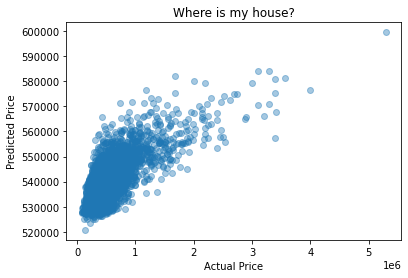

In [9]:
# 그래프 출력 x축 가격, y축 예측 가격 ,y_test = 시험데이터의 값, 실제 가격
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Where is my house?")
plt.show()

In [10]:
# 기울기, 절편확인
mlr.coef_

array([[1.14918998e+03, 2.39110815e+03, 2.70844979e+00, 8.39255560e-03,
        1.64421961e+03, 1.06011589e+04, 1.84324122e+03, 2.59430231e+00,
        2.63552434e+00, 5.10569914e+00]])

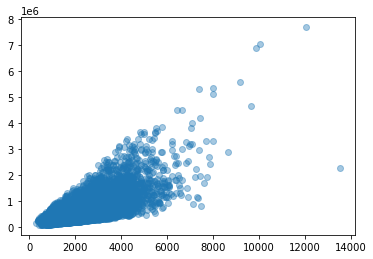

In [11]:
# 주택의 면적 'sqft_licing'과 가격 'price'
plt.scatter(data[['sqft_living']], data[['price']], alpha=0.4)
plt.show()

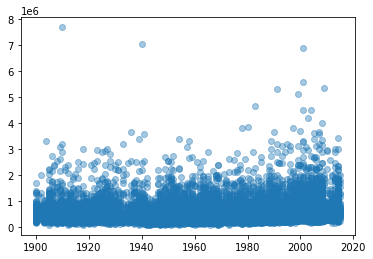

In [12]:

# 주택이 얼마나 오래 전에 지어졌는지 'yr_built'와 가격 'price'
plt.scatter(data[['yr_built']], data[['price']], alpha=0.4)
plt.show()

In [13]:
# yr_bulit와 price의 corelation 확인
np.corrcoef(np.array(data['yr_built']), np.array(data['price']))
np.array(data['yr_built'])
np.corrcoef(np.array(data['sqft_living']), np.array(data['price']))

array([[1.        , 0.70203505],
       [0.70203505, 1.        ]])

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#RMSE = mean_squared_error(y_test, y_predict, squared = False)
RMSE = sqrt(mean_squared_error(y_test, y_predict))
RMSE

361225.6590893601